# MNIST Faashion Image Classification

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 2-Nov-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

## Project Overview
In this project, we classify images from the Fashion MNIST dataset using a Convolutional Neural Network (CNN). The dataset contains images of different fashion items such as shoes, bags, and shirts, with labels for each item. We will preprocess the data, build a CNN model, evaluate its performance, and visualize the results.

### Data Introduction
Fashion MNIST is a dataset of 70,000 grayscale images of 10 different fashion items. Each image is 28x28 pixels, and the dataset is divided into 60,000 training images and 10,000 test images. The labels range from 0 to 9, where each label represents a different item.

## 1. Importing the necessary libraries

In [127]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Loading and Exploring the Data

In [128]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [129]:
# Checking the shape of the dataset
print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (60000, 28, 28), (60000,)
Testing data shape: (10000, 28, 28), (10000,)


### Observation:
* The training set contains 60,000 images, and the test set contains 10,000 images.
* Each image has a shape of 28x28 pixels in grayscale.

## 3. Data Visualization
Let's visualize a few sample images to understand the dataset.

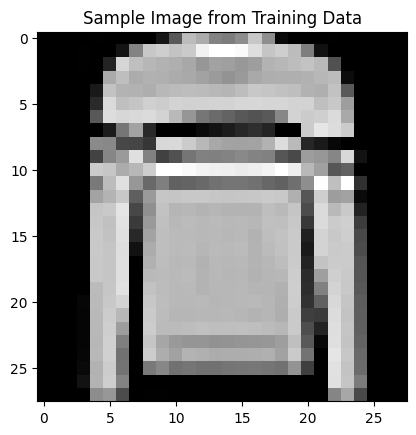

In [130]:
# Plotting some example images
plt.imshow(X_train[5], cmap='gray')
plt.title("Sample Image from Training Data")
plt.show()

## 4. Data Preprocessing
To improve the model's performance, we will normalize the data by scaling pixel values between 0 and 1. Additionally, we will convert the labels to categorical format.

In [131]:
# Normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Converting labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Next, we reshape the data to match the input shape expected by CNN layers.

In [132]:
# Reshaping the data
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

## 5. Model Building
We will create a Sequential CNN model with two convolutional layers followed by max-pooling layers. Dropout is added to prevent overfitting.

In [133]:
# Defining the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 100)            │       160,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,926 (702.84 KB)

 Trainable params: 179,926 (702.84 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Model Training
We will train the model for 10 epochs using a batch size of 32. Validation data will help us monitor the model's performance on unseen data.

In [134]:
# Training the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=10, verbose=2)

Epoch 1/10
1875/1875 - 13s - 7ms/step - accuracy: 0.8201 - loss: 0.5034 - val_accuracy: 0.8708 - val_loss: 0.3601
Epoch 2/10
1875/1875 - 16s - 9ms/step - accuracy: 0.8796 - loss: 0.3316 - val_accuracy: 0.8880 - val_loss: 0.3058
Epoch 3/10
1875/1875 - 12s - 6ms/step - accuracy: 0.8958 - loss: 0.2842 - val_accuracy: 0.8950 - val_loss: 0.2958
Epoch 4/10
1875/1875 - 19s - 10ms/step - accuracy: 0.9054 - loss: 0.2554 - val_accuracy: 0.8964 - val_loss: 0.2826
Epoch 5/10
1875/1875 - 15s - 8ms/step - accuracy: 0.9139 - loss: 0.2309 - val_accuracy: 0.9019 - val_loss: 0.2699
Epoch 6/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9215 - loss: 0.2097 - val_accuracy: 0.8984 - val_loss: 0.2866
Epoch 7/10
1875/1875 - 12s - 6ms/step - accuracy: 0.9274 - loss: 0.1935 - val_accuracy: 0.9033 - val_loss: 0.2811
Epoch 8/10
1875/1875 - 14s - 7ms/step - accuracy: 0.9337 - loss: 0.1773 - val_accuracy: 0.9079 - val_loss: 0.2720
Epoch 9/10
1875/1875 - 15s - 8ms/step - accuracy: 0.9380 - loss: 0.1631 - val_accuracy:

## 7. Performance Evaluation
### Accuracy and Loss Plots
We will plot accuracy and loss over epochs to understand the model's learning behavior.

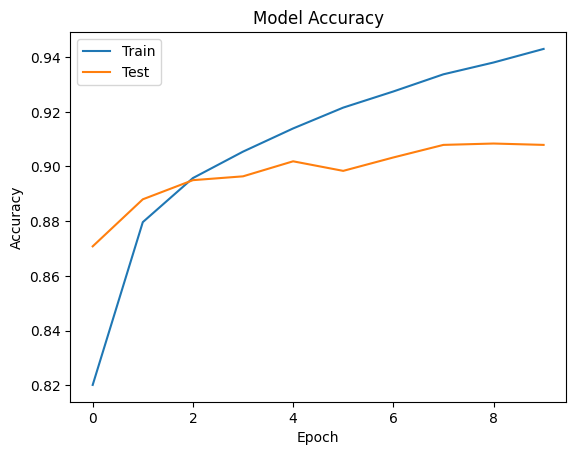

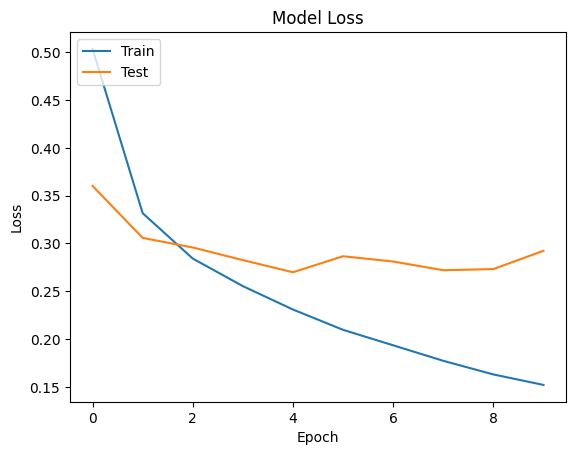

In [135]:
# Visualizing the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Observations:
* The accuracy plot shows the learning trend for both training and test data.
* The model's loss decreases over time, indicating it is learning effectively.

### Confusion Matrix
The confusion matrix provides detailed insight into the model's predictions for each class.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


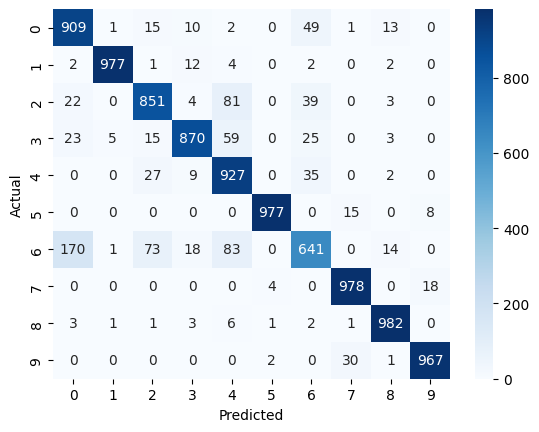

In [136]:
# Generating predictions and confusion matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Observation:
* The confusion matrix shows the model's predictions compared to actual values, helping us identify which categories the model struggles with.

In [137]:
# Displaying classification report
print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.87      0.85      0.86      1000
           3       0.94      0.87      0.90      1000
           4       0.80      0.93      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.81      0.64      0.72      1000
           7       0.95      0.98      0.97      1000
           8       0.96      0.98      0.97      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### Classification Report
* The classification report provides detailed metrics such as precision, recall, and F1-score for each class.

### Sample Predictions
Let's plot some sample predictions to visualize the model's performance on individual images.

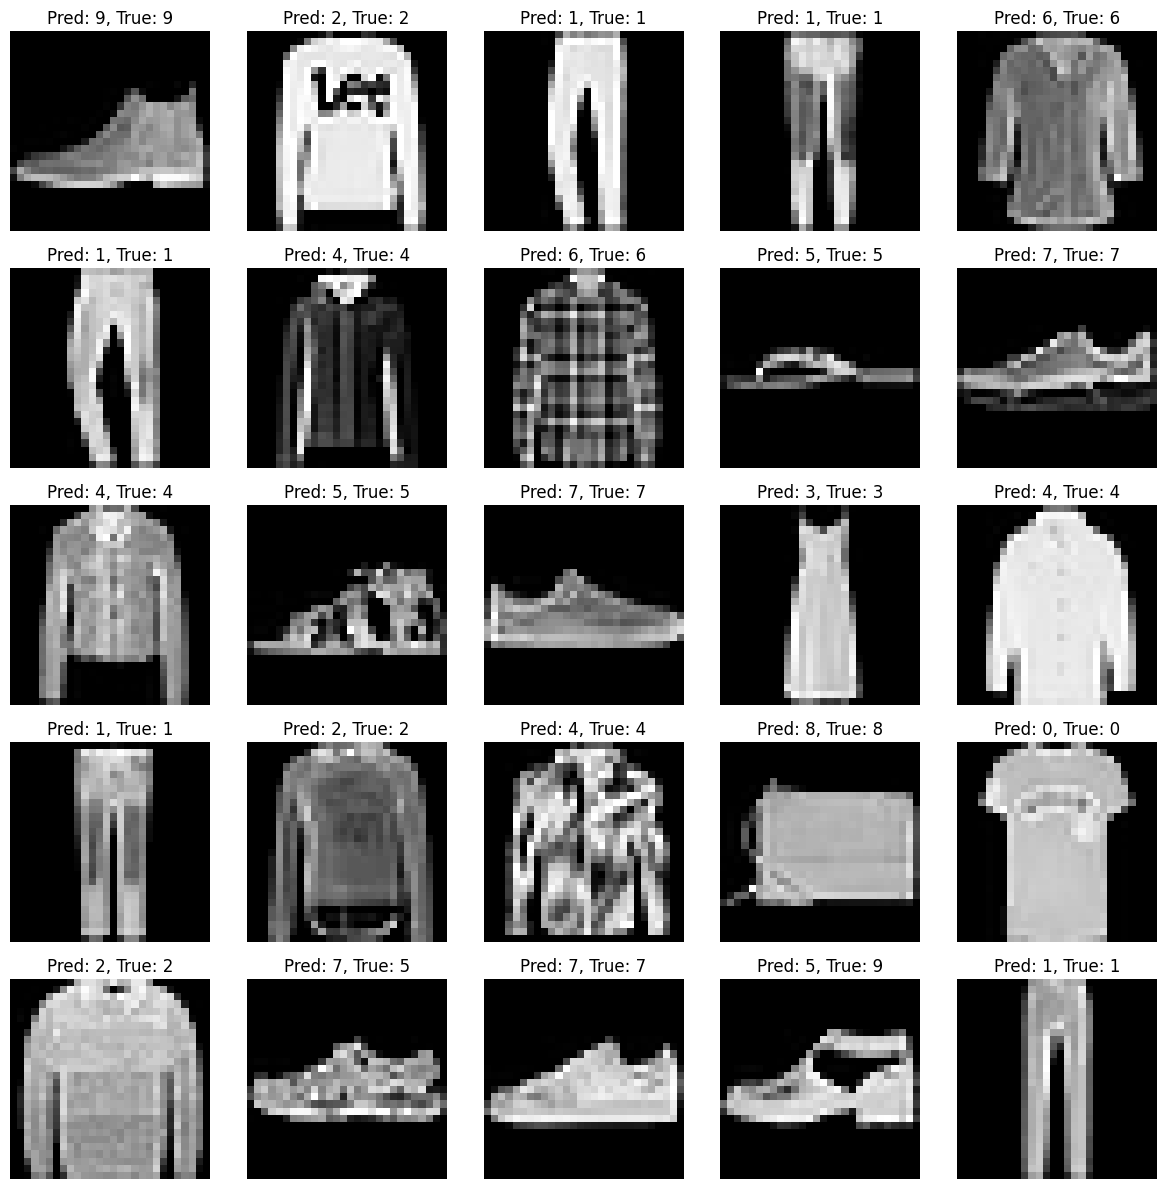

In [138]:
# Plotting predicted images
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
for i in range(25):
    ax[i//5, i%5].imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax[i//5, i%5].set_title(f"Pred: {y_pred[i]}, True: {np.argmax(y_test[i])}")
    ax[i//5, i%5].axis("off")
plt.tight_layout()
plt.show()

## Summary
In this project, we built a CNN model to classify fashion images from the MNIST Fashion dataset. We chose TensorFlow and Keras for building the deep learning model due to their flexibility and ease of use in designing complex neural networks. Matplotlib and Seaborn were used for visualizations, and scikit-learn was used for evaluating the model's performance.

Overall, the CNN model performed well, with a good balance between accuracy and loss across training and validation data, demonstrating its effectiveness in fashion item classification.